In [46]:
import numpy as np
import matplotlib.pyplot as plt

## Posibles mejoras al modelo
Witkowski menciona en su articulo [Bayesian Analysis of Epidemics - Zombies, Influenza, and other Diseases](https://arxiv.org/pdf/1311.6376.pdf) ligado a la presentación los modelos de mejora que propone. Habla dos tipos de modelos que se ajustan mejor a películas de la cultura popular. Sin embargo simplifican los modelos a uno parecido al de Munz sin el reciclaje de los zombies. Intentenmos replicar los resultados mostrados en la presentación.

In [47]:
def euler(y, t, dt, derivadas):
    y_next = y + derivadas(y, t)*dt
    return y_next

### Nigth of the Living Dead
Considered the first depiction of zombies in the popular culture, Romeros’ three films(Romero and Russo, 1968; Romero, 1978, 1985) (Night of the Living Dead, Dawn of the Dead, and Day of the Dead) all take place in the same apocalyptic world and thus exhibit the same dynamics, as shown in Figure 1D. The dynamical equations are derived from the following observations from
the movies:
1. Anyone who dies becomes a zombie, regardless of contact with one.
2. Because contact with a zombie is likely to lead to death, the interaction between the two subpopulations of susceptibles and zombies is significant.
3. This interaction between susceptibles and zombies results in a temporarily removed subpopulation before members of that population become zombies.
4. The only way in which a zombie can be permanently removed is by destroying the brain or burning the body.
These observations yield the following dynamical equations:
$$
\dot{S} = − βSZ − δS
$$
$$
\dot{E} = + βSZ − ζE
$$
$$
\dot{Z} = + ζE − αSZ
$$
$$
\dot{R} = + αSZ + δS
$$

In [48]:
a = 0.9
b = 1.1
d = 0
z = 3.6
def NLD_Model(estado, sistema):
    g0 = -b*estado[0]*estado[2] -d*estado[0]
    g1 = b*estado[0]*estado[2] -z*estado[1]
    g2 = z*estado[1] - a*estado[0]*estado[2]
    g3 = a*estado[0]*estado[2] + d*estado[0]
    return np.array([g0, g1, g2, g3])

Text(0.5, 1.0, 'Modelo basado en la noche de los muertos vivientes')

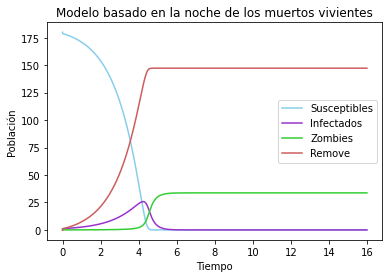

In [49]:
s0 = 180  # susceptibles inicial
e0 = 0.0 # infectados
z0 = 1.0  # zombies
r0 = 0.0  # remove

N = 100000 # número de pasos
tau = 16.0 # tiempo de la simulación
dt = tau/(float)(N-1)  # tamaño del paso
time = np.linspace(0, tau, N)
y = np.zeros([N,4])

y[0,0] = s0
y[0,1] = e0
y[0,2] = z0
y[0,3] = r0

for j in range(N-1):
    y[j+1] = euler(y[j], time[j], dt, NLD_Model)
susdata = [y[j,0] for j in range(N)]
edata = [y[j,1] for j in range(N)]
zomdata = [y[j,2] for j in range(N)]
remdata = [y[j,3] for j in range(N)]

plt.plot(time, susdata, label="Susceptibles", color = 'skyblue')
plt.plot(time, edata, label="Infectados", color = 'darkorchid')
plt.plot(time, zomdata, label="Zombies", color = 'limegreen')
plt.plot(time, remdata, label="Remove", color = 'indianred')
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.legend(loc="best")
plt.title("Modelo basado en la noche de los muertos vivientes")

### Shaun of the Dead
Although the film’s title is a play on Dawn of the Dead, the zombie farce Shaun of the Dead (Wright
and Pegg, 2004) has a very different dynamical structure, as shown in Figure 1E. We use Shaun
of the Dead because it is the most typical representation of popular zombie films. The greatest
difference between this model to the previous model proposed is that contact between a susceptible
and zombie is necessary for the zombie population to grow - not all susceptibles who die become
zombies.
$$
\dot{S} = −βSZ
$$
$$
\dot{E} = +βSZ − ζE
$$
$$
\dot{Z} = +ζE − αSZ
$$
$$
\dot{R} = +αSZ
$$

In [53]:
a = 0.49
b = 0.59
z = 2
def SD_Model(estado, sistema):
    g0 = -b*estado[0]*estado[2]
    g1 = b*estado[0]*estado[2] -z*estado[1]
    g2 = z*estado[1] - a*estado[0]*estado[2]
    g3 = a*estado[0]*estado[2]
    return np.array([g0, g1, g2, g3])

Text(0.5, 1.0, 'Modelo basado en Shaun of the Dead')

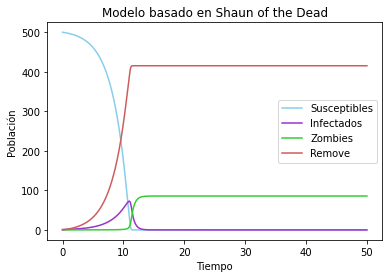

In [55]:
s0 = 500  # susceptibles inicial
e0 = 1.0 # infectados
z0 = 0.0  # zombies
r0 = 0.0  # remove

N = 100000 # número de pasos
tau = 50.0 # tiempo de la simulación
dt = tau/(float)(N-1)  # tamaño del paso
time = np.linspace(0, tau, N)
y = np.zeros([N,4])

y[0,0] = s0
y[0,1] = e0
y[0,2] = z0
y[0,3] = r0

for j in range(N-1):
    y[j+1] = euler(y[j], time[j], dt, SD_Model)
susdata = [y[j,0] for j in range(N)]
edata = [y[j,1] for j in range(N)]
zomdata = [y[j,2] for j in range(N)]
remdata = [y[j,3] for j in range(N)]

plt.plot(time, susdata, label="Susceptibles", color = 'skyblue')
plt.plot(time, edata, label="Infectados", color = 'darkorchid')
plt.plot(time, zomdata, label="Zombies", color = 'limegreen')
plt.plot(time, remdata, label="Remove", color = 'indianred')
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.legend(loc="best")
plt.title("Modelo basado en Shaun of the Dead")

### Simplified Form
If δ is small in Equation 4 (i.e. suicides are neglected), and ζ is large in Equations 4 and 5
(i.e. exposed people become zombies within minutes), then both models reduce to the following
simplified form:
$$
\dot{S} = −βSZ
$$
$$
\dot{Z} = +βSZ − αSZ
$$
$$
\dot{R} = +αSZ
$$

In [56]:
a = 0.49
b = 0.59
# z = 2
def Simplified_Model(estado, sistema):
    g0 = -b*estado[0]*estado[1]
    g1 = b*estado[0]*estado[1] - a*estado[0]*estado[1]
    g2 = a*estado[0]*estado[1]
    return np.array([g0, g1, g2])

Text(0.5, 1.0, 'Modelo simple con parámetros de Shaun of the Dead')

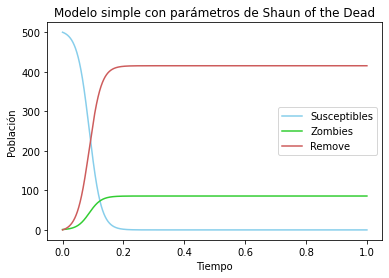

In [59]:
s0 = 500  # susceptibles inicial
z0 = 1.0  # zombies
r0 = 0.0  # remove

N = 100000 # número de pasos
tau = 1.0 # tiempo de la simulación
dt = tau/(float)(N-1)  # tamaño del paso
time = np.linspace(0, tau, N)
y = np.zeros([N,3])

y[0,0] = s0
y[0,1] = z0
y[0,2] = r0

for j in range(N-1):
    y[j+1] = euler(y[j], time[j], dt, Simplified_Model)
susdata = [y[j,0] for j in range(N)]
zomdata = [y[j,1] for j in range(N)]
remdata = [y[j,2] for j in range(N)]

plt.plot(time, susdata, label="Susceptibles", color = 'skyblue')
plt.plot(time, zomdata, label="Zombies", color = 'limegreen')
plt.plot(time, remdata, label="Remove", color = 'indianred')
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.legend(loc="best")
plt.title("Modelo simple con parámetros de Shaun of the Dead")